In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# load csv files
customer_df = pd.read_csv('customer_signups.csv')
support_tickets_df = pd.read_csv('support_tickets.csv')

# Exploratory Data Analysis

## Customer Signup data exploration

In [3]:
customer_df.describe()

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
count,298,291,266,298,291,270,292,291,288,292
unique,298,291,265,295,7,5,8,4,11,7
top,CUST00000,Joshua Bryant,lisa11@mailhub.org,not a date,YouTube,North,Premium,No,40,Other
freq,1,1,2,4,58,65,57,156,50,59


In [4]:
customer_df.head()

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02-01-24,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03-01-24,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04-01-24,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05-01-24,LinkedIn,West,Premium,No,25,Other


In [5]:
df1 = customer_df.copy()

## Datatype conversion

In [6]:
df1.dtypes

customer_id         object
name                object
email               object
signup_date         object
source              object
region              object
plan_selected       object
marketing_opt_in    object
age                 object
gender              object
dtype: object

### signup_date column conversion

In [7]:
# Checking the date format
df1['signup_date']

0           NaN
1      02-01-24
2      03-01-24
3      04-01-24
4      05-01-24
         ...   
295    22-10-24
296    23-10-24
297    24-10-24
298    25-10-24
299    26-10-24
Name: signup_date, Length: 300, dtype: object

In [8]:
# null value count for verification
df1['signup_date'].isna().sum()

2

In [9]:
# converting dtype to datetime dtype, errors will be set to null for invalid parsing
df1['signup_date'] = pd.to_datetime(df1['signup_date'], dayfirst=True, errors='coerce')

In [10]:
# null value count for verification - had 4 'not a date' values
df1['signup_date'].isna().sum()

6

### Age column conversion

In [11]:
# null value count for verification
df1['age'].isnull().sum()

12

In [12]:
# converting age to numeric dtype, errors will be set to null for invalid parsing
df1['age'] = pd.to_numeric(df1['age'], errors= 'coerce').astype('Int64')

In [13]:
# null value count for verification
df1['age'].isnull().sum()

19

In [14]:
# Checking for discrepancies between original and converted age columns
# Create a DataFrame with both original and converted age columns
comparison = pd.DataFrame({
    'customer_id' : customer_df['customer_id'],
    'original_age': customer_df['age'],
    'cust_id': df1['customer_id'],
    'converted_age': df1['age']
})

# filter only rows where either column is null
null_rows = comparison[comparison['original_age'].isnull() | comparison['converted_age'].isnull()]

# Display the result
null_rows

,customer_id,original_age,cust_id,converted_age
21,CUST00021,NaN,CUST00021,<NA>
23,CUST00023,unknown,CUST00023,<NA>
33,CUST00033,unknown,CUST00033,<NA>
37,CUST00037,NaN,CUST00037,<NA>
40,CUST00040,unknown,CUST00040,<NA>
53,CUST00053,NaN,CUST00053,<NA>
56,CUST00056,NaN,CUST00056,<NA>
76,CUST00076,NaN,CUST00076,<NA>
88,CUST00088,unknown,CUST00088,<NA>
108,CUST00108,NaN,CUST00108,<NA>


In [15]:
# Manually correcting the age value for customer_id 'CUST00116' from 'twenty' to 30
df1.loc[df1['customer_id'] == 'CUST00116', 'age'] = 30

## Visualisations for understanding the data in age column

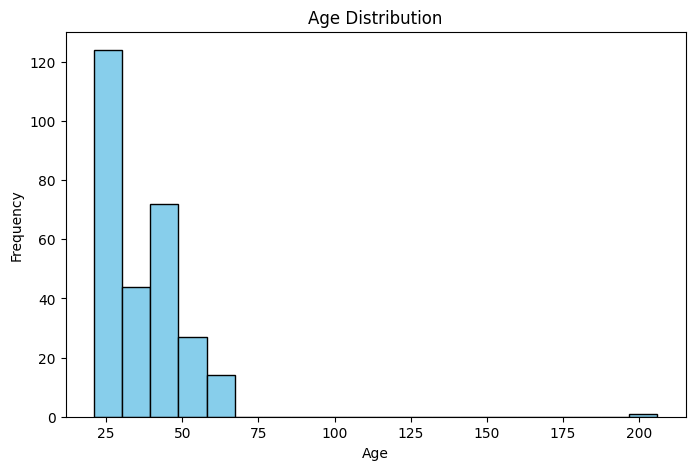

In [16]:
# Visualizing the age distribution
plt.figure(figsize=(8,5))
plt.hist(df1['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Handling Missing Data and Standardisation

### Summary of Missing Data

In [17]:
# Missing Data Count before dtype conversions
customer_df.isnull().sum()

customer_id          2
name                 9
email               34
signup_date          2
source               9
region              30
plan_selected        8
marketing_opt_in     9
age                 12
gender               8
dtype: int64

In [18]:
# Missing Data Count after dtype conversions
df1.isnull().sum()     

customer_id          2
name                 9
email               34
signup_date          6
source               9
region              30
plan_selected        8
marketing_opt_in     9
age                 18
gender               8
dtype: int64

In [19]:
# Percentage of missing data after dtype conversions
(df1.isna().sum() / len(df1)) * 100


customer_id          0.666667
name                 3.000000
email               11.333333
signup_date          2.000000
source               3.000000
region              10.000000
plan_selected        2.666667
marketing_opt_in     3.000000
age                  6.000000
gender               2.666667
dtype: float64

### Checking for Duplicate Values

In [20]:
df1.duplicated().value_counts()

False    300
dtype: int64

### Handling Missing Data

#### customer_id column

In [21]:
mask = df1['customer_id'].isna()
mask.value_counts()

False    298
True       2
Name: customer_id, dtype: int64

In [22]:
df1.loc[mask, 'customer_id'] = [f"TEMP{i+1}" for i in range(mask.sum())]

In [23]:
mask = df1['customer_id'].isna()
mask.value_counts()

False    300
Name: customer_id, dtype: int64

In [24]:
df1[df1['customer_id'].str.startswith('TEMP')]

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
161,TEMP1,Robert Carter,robert61@example.com,2024-06-10,LinkedIn,South,Pro,Yes,34,Male
287,TEMP2,Antonio Hammond,antonio87@inboxmail.net,2024-10-14,Instagram,West,prem,Yes,25,FEMALE


#### plan_selected column

In [25]:
# Exploring the plan_selected column
df1['plan_selected'].value_counts()

Premium        57
Pro            53
basic          46
Basic          46
PREMIUM        42
PRO            41
UnknownPlan     6
prem            1
Name: plan_selected, dtype: int64

In [26]:
# Standardising the plan_selected column
df1['plan_selected'] = df1['plan_selected'].replace({'PRO': 'Pro', 'basic': 'Basic', 'PREMIUM' : 'Premium', 'prem' : 'Premium'})

In [27]:
df1['plan_selected'].value_counts()

Premium        100
Pro             94
Basic           92
UnknownPlan      6
Name: plan_selected, dtype: int64

In [28]:
df1['plan_selected'].isnull().sum()

8

#### gender column

In [29]:
# Exploring the gender column
df1['gender'].value_counts()

Other         59
FEMALE        52
male          48
Male          44
Non-Binary    42
Female        41
123            6
Name: gender, dtype: int64

In [30]:
# Standardising the gender column
df1['gender'] = df1['gender'].replace({'male': 'Male', 'FEMALE': 'Female', 'female': 'Female'})

In [31]:
# Handling invalid gender entries
df1['gender'] = df1['gender'].replace({'123': pd.NA})

In [32]:
# Change in null value count
df1['gender'].isnull().sum()

14

#### region column

In [33]:
# Exploring the region column
df1['region'].value_counts()

North      65
East       61
South      59
West       46
Central    39
Name: region, dtype: int64

In [34]:
df1['region'].isnull().sum()

30

In [35]:
# df1['region'].fillna('Unknown', inplace=True)

#### Source column

In [36]:
# Exploring the Source column
df1['source'].value_counts()

YouTube      58
Google       50
Instagram    49
Referral     49
Facebook     40
LinkedIn     39
??            6
Name: source, dtype: int64

In [37]:
# Handling invalid source entries
df1['source'] = df1['source'].replace({'??': pd.NA})

In [38]:
# Change in null value count
df1['source'].isnull().sum()

15

#### marketing_opt_in column

In [39]:
# Exploring the marketing_opt_in column
df1['marketing_opt_in'].value_counts()

No      156
Yes     133
Nil       1
None      1
Name: marketing_opt_in, dtype: int64

In [40]:
# Standardising the marketing_opt_in column - None is considered as No
df1['marketing_opt_in'] = df1['marketing_opt_in'].replace({'None': 'No', 'Nil': pd.NA})

In [41]:
# Change in null value count
df1['marketing_opt_in'].isnull().sum() 

10

#### age column

In [42]:
# Understanding the spread of the age column - numeric column
df1['age'].describe()

count    282.000000
mean      36.113475
std       14.963820
min       21.000000
25%       25.000000
50%       34.000000
75%       40.000000
max      206.000000
Name: age, dtype: float64

In [43]:
# IQR method to identify outliers
desc = df1['age'].describe()
Q1 = desc['25%']
Q3 = desc['75%']
IQR = Q3 - Q1

df1.loc[(df1['age'] < Q1 - 1.5*IQR) | (df1['age'] > Q3 + 1.5*IQR), 'age'].count()


1

In [44]:
# Handling outliers by setting them to NaN
df1.loc[(df1['age'] < Q1 - 1.5*IQR) | (df1['age'] > Q3 + 1.5*IQR), 'age'] = pd.NA

In [45]:
# Could fill the NaN values with median age - decided to keep as NaN for analysis
# df1['age'].fillna(df1['age'].median(), inplace=True)

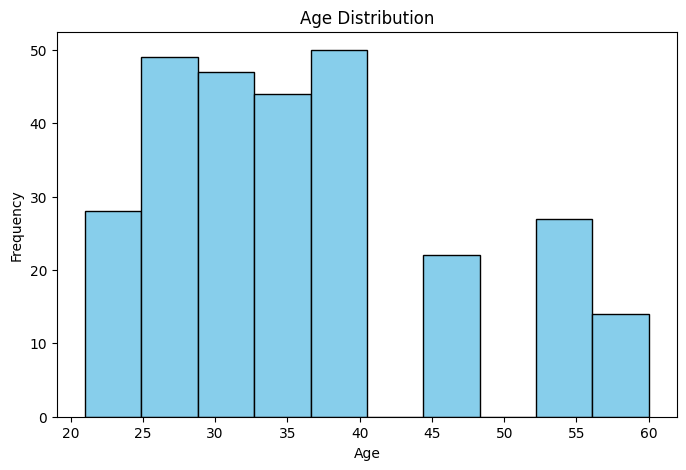

In [46]:
# Visualizing the age distribution
plt.figure(figsize=(8,5))
plt.hist(df1['age'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Summary Outputs

### weekly sign ups

In [47]:
weekly_signups = df1.groupby(pd.Grouper(key='signup_date', freq='W', dropna=True))['signup_date'].count().reset_index(name='signups')
weekly_signups['week_number'] = weekly_signups['signup_date'].dt.isocalendar().week
weekly_signups

,signup_date,signups,week_number
0,2024-01-07,6,1
1,2024-01-14,7,2
2,2024-01-21,7,3
3,2024-01-28,7,4
4,2024-02-04,8,5
5,2024-02-11,7,6
6,2024-02-18,7,7
7,2024-02-25,7,8
8,2024-03-03,7,9
9,2024-03-10,7,10


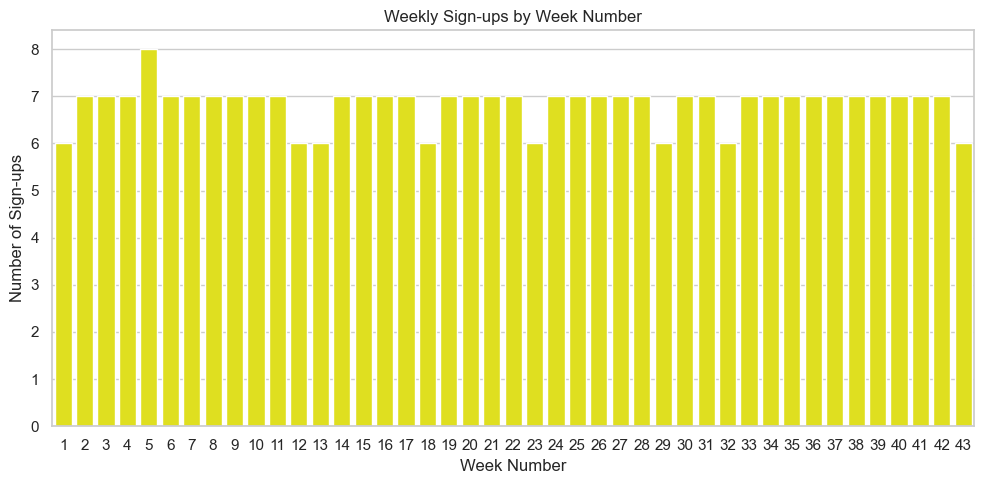

In [48]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(data=weekly_signups, x='week_number', y='signups', color = 'yellow')
plt.title('Weekly Sign-ups by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Number of Sign-ups')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### sign ups by source

In [49]:
source_counts = df1.groupby('source')['customer_id'].count().reset_index(name='count')
source_counts

,source,count
0,Facebook,40
1,Google,50
2,Instagram,49
3,LinkedIn,39
4,Referral,49
5,YouTube,58


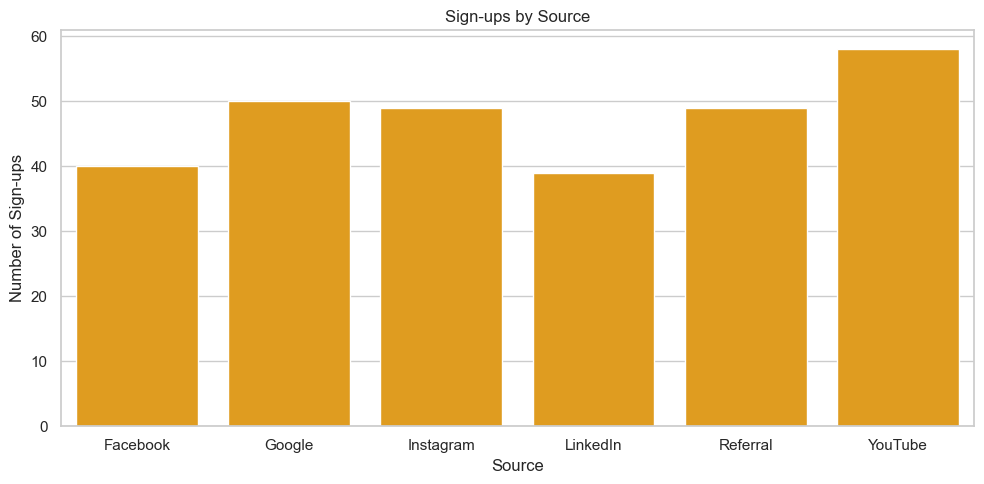

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(data=source_counts, x='source', y='count', color = 'orange')
plt.title('Sign-ups by Source')
plt.xlabel('Source')
plt.ylabel('Number of Sign-ups')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### sign ups by region

In [51]:
region_count = df1.groupby('region')['customer_id'].count().reset_index(name='count')
region_count

,region,count
0,Central,39
1,East,61
2,North,65
3,South,59
4,West,46


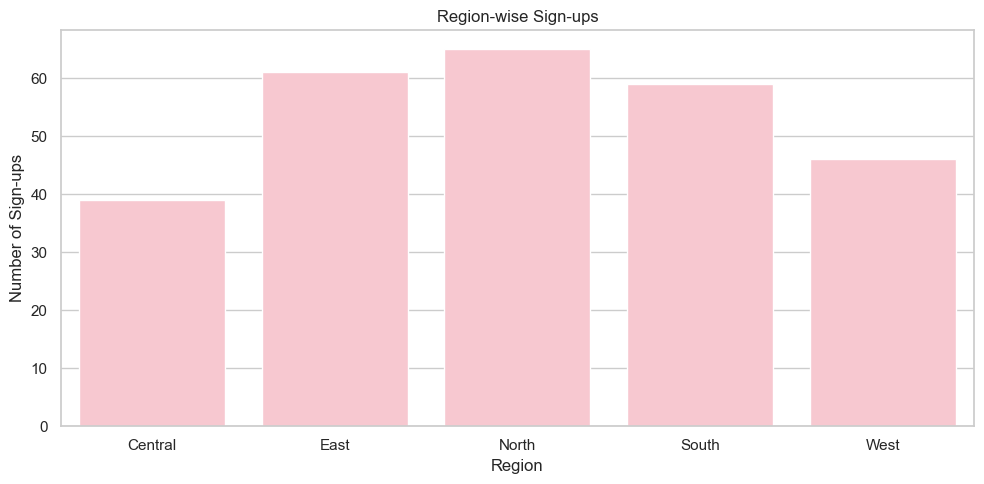

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(data=region_count, x='region', y='count', color = 'pink')
plt.title('Region-wise Sign-ups')
plt.xlabel('Region')
plt.ylabel('Number of Sign-ups')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Gender based distribution for marketing opt-in

In [53]:
marketing_gender_distribuiton = df1.groupby(['marketing_opt_in', 'gender'])['customer_id'].count().reset_index(name='count')
marketing_gender_distribuiton

,marketing_opt_in,gender,count
0,No,Female,47
1,No,Male,51
2,No,Non-Binary,20
3,No,Other,32
4,Yes,Female,45
5,Yes,Male,38
6,Yes,Non-Binary,19
7,Yes,Other,24


### Comaparison between Age and Marketing opt-in

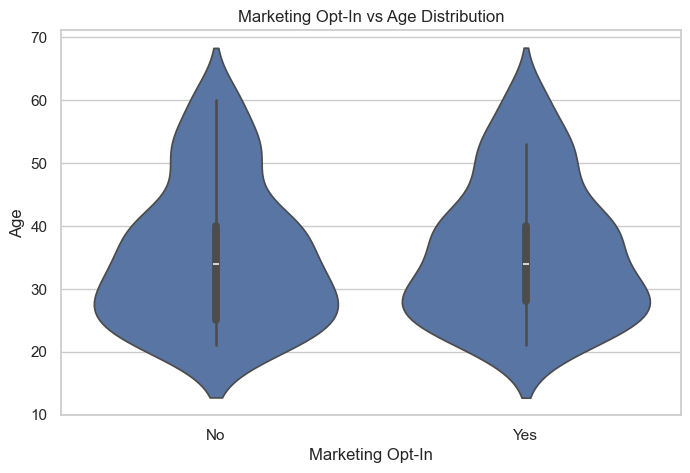

In [54]:
# Visualizing age distribution by plan using violin plot
plt.figure(figsize=(8,5))
sns.violinplot(x='marketing_opt_in', y='age', data=df1)
plt.title('Marketing Opt-In vs Age Distribution')
plt.xlabel('Marketing Opt-In')
plt.ylabel('Age')
plt.show()

### age summary

In [55]:
age_summary = pd.DataFrame({'max_age': [df1['age'].max()],
                            'min_age': [df1['age'].min()],
                            'mean_age': [df1['age'].mean()],
                            'median_age': [df1['age'].median()]})
age_summary


,max_age,min_age,mean_age,median_age
0,60,21,35.508897,34.0


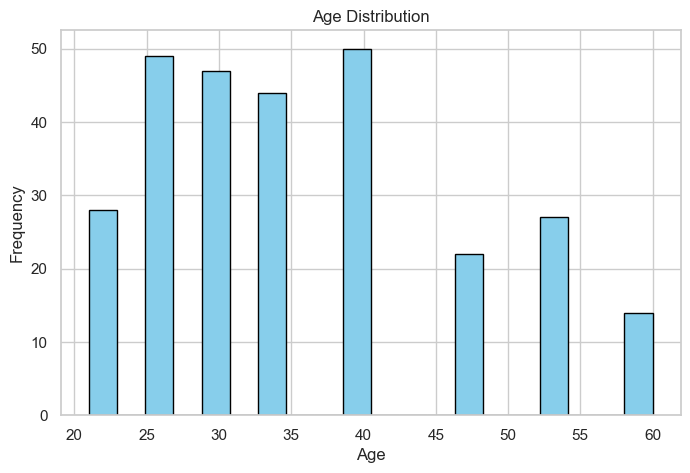

In [56]:
# Visualizing the age distribution
plt.figure(figsize=(8,5))
plt.hist(df1['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Business Questions

## Question 1 : Which acquisition source brought in the most users last month?

In [57]:
# extracting last month
last_month = df1['signup_date'].max().month

# filtering on last month
last_month_signups = df1[df1['signup_date'].dt.month == last_month]

# aggregating signups by source
q1 = last_month_signups.groupby('source')['customer_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
q1

,source,count
1,Google,7
5,YouTube,5
0,Facebook,4
2,Instagram,4
4,Referral,3
3,LinkedIn,1


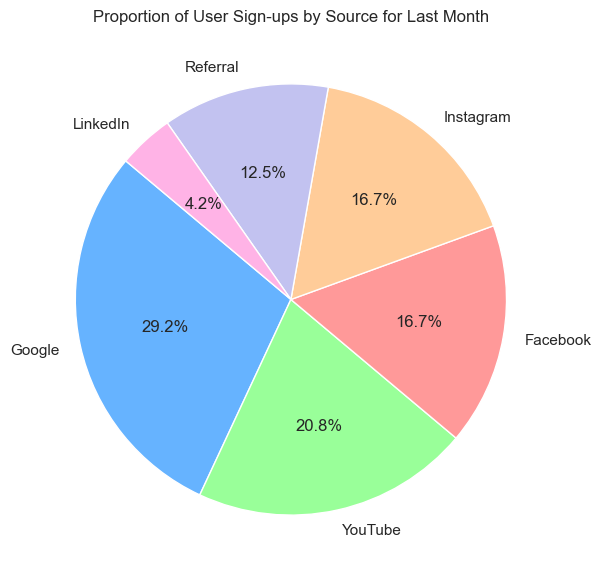

In [58]:
# Pie chart for sign-ups by source for last month
plt.figure(figsize=(7,7))
plt.pie(q1['count'], 
        labels=q1['source'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#66b3ff','#99ff99','#ff9999','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title("Proportion of User Sign-ups by Source for Last Month")
plt.show()

## Question 2 : Which region shows signs of missing or incomplete data?


In [59]:
# Count missing values per region for each column
q2 = df1.groupby('region', dropna = False).apply(lambda x: x.isna().sum())
q2['total_missing'] = q2.sum(axis=1)
q2

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender,total_missing
region,,,,,,,,,,,
Central,0,0,5,1,1,0,0,2,3,1,13
East,0,2,7,0,1,0,2,2,5,5,24
North,0,3,10,1,4,0,3,3,4,1,29
South,0,1,4,2,3,0,0,2,2,3,17
West,0,3,4,1,4,0,2,1,3,4,22
NaN,0,0,4,1,2,30,1,0,2,0,40


## Question 3 : Are older users more or less likely to opt in to marketing?


In [60]:
# creating age groups
bins = range(df1['age'].min(), df1['age'].max()+10, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]
df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels, right=False)
df1['age_group'].value_counts()

# Count of marketing opt-in by age group
q3 = df1.groupby(['age_group', 'marketing_opt_in'])['customer_id'].count().unstack(fill_value=0)
print(q3)

marketing_opt_in  No  Yes
age_group                
21-30             65   53
31-40             50   42
41-50             10   11
51-60             22   18


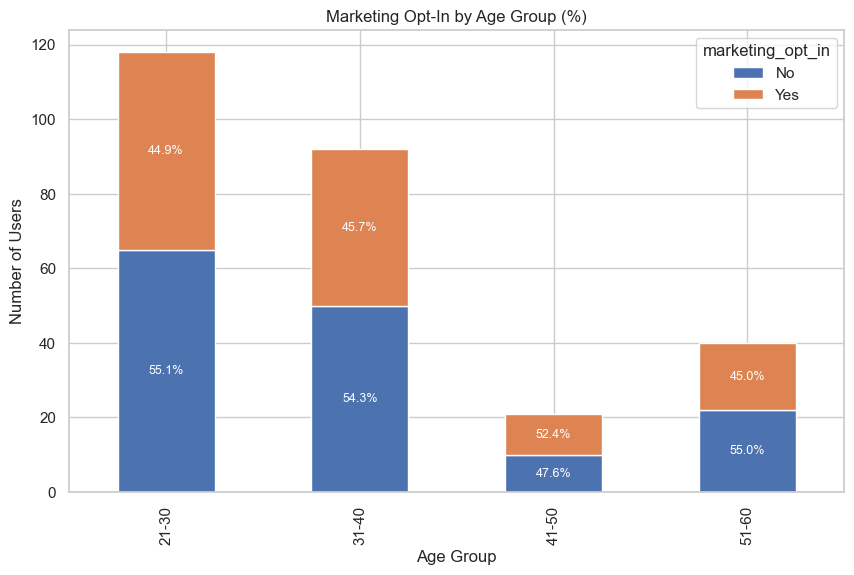

In [61]:
# Visualisation for marketing opt-in by age group using stacked bar chart
x = q3.plot(kind='bar', stacked=True, figsize=(10,6))

for p in x.patches:
    height = p.get_height()
    if height > 0:  
        
        total = sum([patch.get_height() for patch in x.patches if patch.get_x() == p.get_x()])
        percent = height / total * 100
        x.annotate(f'{percent:.1f}%', 
                    (p.get_x() + p.get_width()/2, p.get_y() + height/2),
                    ha='center', va='center', color='white', fontsize=9)

plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.title("Marketing Opt-In by Age Group (%)")
plt.show()

## Question 4 : Which plan is most commonly selected, and by which age group?


In [62]:
# Surface analysis of plan_selected column
df1['plan_selected'].value_counts()

Premium        100
Pro             94
Basic           92
UnknownPlan      6
Name: plan_selected, dtype: int64

In [63]:
# indepth analysis of plan_selected by age group
q4 = df1.groupby(['age_group', 'plan_selected'])['customer_id'].count().unstack(fill_value=0)
q4

plan_selected,Basic,Premium,Pro,UnknownPlan
age_group,,,,
21-30,40,38,41,1
31-40,22,39,28,3
41-50,5,9,6,1
51-60,14,10,15,1


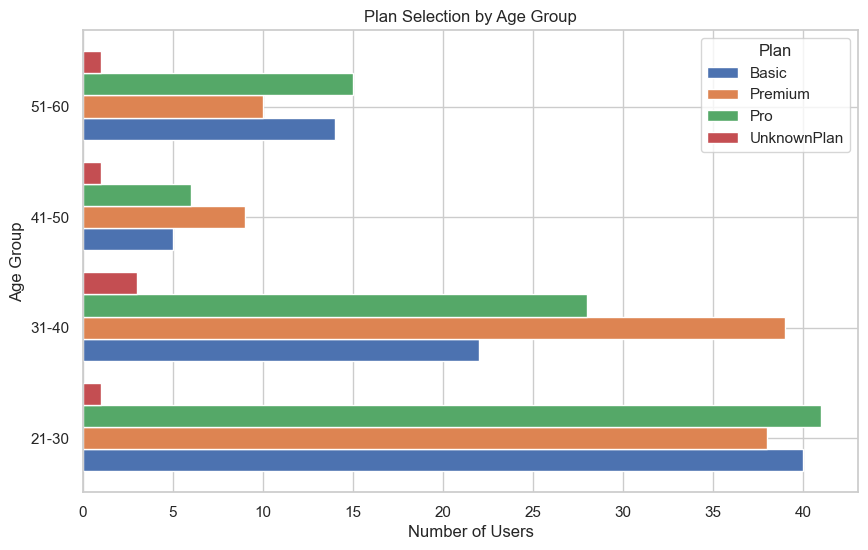

In [64]:
# Visualizing plan selection by age group using horizontal bar chart
age_groups = q4.index.tolist()
plans = q4.columns.tolist()
data = q4.values


y = np.arange(len(age_groups))  
height = 0.2  
offsets = [-height, 0, height, 2*height]  

fig, ax = plt.subplots(figsize=(10,6))


for i, plan in enumerate(plans):
    ax.barh(y + offsets[i], data[:, i], height=height, label=plan)


ax.set_yticks(y)
ax.set_yticklabels(age_groups)
ax.set_ylabel("Age Group")
ax.set_xlabel("Number of Users")
ax.set_title("Plan Selection by Age Group")
ax.legend(title="Plan")
plt.show()

## Question 5 : Which plan’s users are most likely to contact support?

In [65]:
# creating a copy of support_tickets_df
df2 = support_tickets_df.copy()

In [66]:
df2.head()

,ticket_id,customer_id,ticket_date,issue_type,resolved
0,TKT0000-1,CUST00203,2024-08-17,Billing,Yes
1,TKT0000-2,CUST00203,2024-07-22,Technical Error,Yes
2,TKT0000-3,CUST00203,2024-07-22,Other,Yes
3,TKT0001-1,CUST00266,2024-09-26,Account Setup,Yes
4,TKT0001-2,CUST00266,2024-10-09,Technical Error,No


In [67]:
# merging both dataframes on customer_id only keeping records that are present in both dataframes
merged_df = pd.merge(df1, df2, on='customer_id', how='inner')
merged_df.head()

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender,age_group,ticket_id,ticket_date,issue_type,resolved
0,CUST00005,John Gonzales,john5@mailhub.org,2024-01-06,Facebook,South,Premium,No,34,Other,31-40,TKT0008-1,2024-06-04,Other,Yes
1,CUST00007,Michael Bailey,michael7@mailhub.org,2024-01-08,YouTube,Central,Pro,Yes,60,Other,51-60,TKT0036-1,2024-08-07,Billing,Yes
2,CUST00007,Michael Bailey,michael7@mailhub.org,2024-01-08,YouTube,Central,Pro,Yes,60,Other,51-60,TKT0036-2,2024-08-23,Other,Yes
3,CUST00009,Cindy Anderson,NaN,2024-01-10,Google,East,Premium,No,29,Female,21-30,TKT0003-1,2024-10-03,Technical Error,No
4,CUST00017,Patty Paul,patty17@inboxmail.net,2024-01-18,YouTube,East,Pro,No,53,Non-Binary,51-60,TKT0030-1,2024-02-03,Other,Yes


In [68]:
# Count of support tickets by plan
support_by_plan = merged_df.groupby('plan_selected')['ticket_id'].count().sort_values(ascending=False).reset_index(name = 'ticket_count')
print(support_by_plan)


  plan_selected  ticket_count
0           Pro            47
1         Basic            42
2       Premium            26
3   UnknownPlan             4


# Optional Task

In [69]:
# converting ticket_date to datetime dtype
merged_df['ticket_date'] = pd.to_datetime(merged_df['ticket_date'], dayfirst=True)

In [70]:
# calculating days since signup for each support ticket
merged_df['days_since_signup'] = (merged_df['ticket_date'] - merged_df['signup_date']).dt.days

In [71]:
# Filter tickets within 2 weeks (14 days) of signup
within_2_weeks = merged_df[(merged_df['days_since_signup'] <= 14) & (merged_df['days_since_signup'] >= 0)]

# Count of unique customers who contacted support within 2 weeks
num_customers = within_2_weeks['customer_id'].nunique()
print(num_customers)

29


In [72]:
# Count of support tickets by plan and region
support_summary = merged_df.groupby(['plan_selected', 'region'])['ticket_id'].count().reset_index()
support_summary.rename(columns={'ticket_id': 'ticket_count'}, inplace=True)

print(support_summary)

   plan_selected   region  ticket_count
0          Basic  Central             2
1          Basic     East            11
2          Basic    North             3
3          Basic    South            14
4          Basic     West            10
5        Premium  Central             6
6        Premium     East             1
7        Premium    North             6
8        Premium    South             2
9        Premium     West            11
10           Pro  Central            10
11           Pro     East            14
12           Pro    North            11
13           Pro    South             3
14           Pro     West             6
15   UnknownPlan    North             4


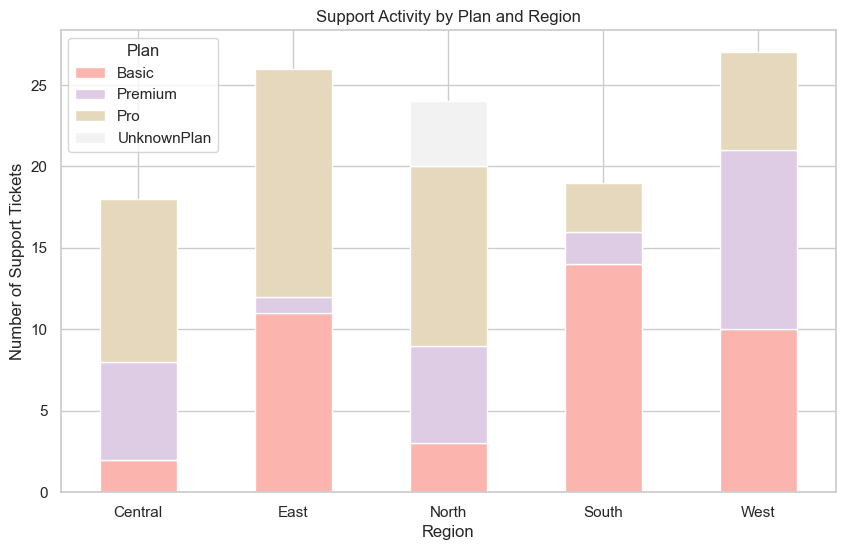

In [73]:
# Visualizing support activity by plan and region using stacked bar chart
stacked_data = support_summary.pivot(index='region', columns='plan_selected', values='ticket_count').fillna(0)

x = stacked_data.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Pastel1')

plt.ylabel("Number of Support Tickets")
plt.xlabel("Region")
plt.title("Support Activity by Plan and Region")
plt.legend(title="Plan")
plt.xticks(rotation=0)  
plt.show()